In [2]:
# 导入一些必要的包

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

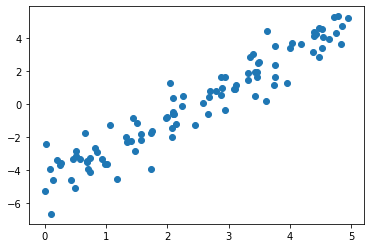

In [96]:
# 复习矩阵的创建
a = np.array([[1,2],[3,4]])
m = np.mat(a)    # NumPy中创建矩阵需要使用mat函数，该函数需要输入二维数组

# 模拟一些数据，并且加上随机性
rng = np.random.RandomState(1)     # 设置随机数种子
x = 5*rng.rand(100)                        # 100个[0,5)的随机数
y = 2*x-5+rng.randn(100)            # 真实规律的标签取值
plt.scatter(x,y)


# 可以尝试将数据变成DataFrame

In [97]:
data = pd.DataFrame({'x' : x, 'label' : y})
data.head()

,x,label
0,2.085110,-0.514145
1,3.601622,0.181044
2,0.000572,-5.305060
3,1.511663,-1.148700
4,0.733779,-3.302346


In [23]:
a = np.array([[1,2],[2,3],[3,4]])
b = np.array([1, 1, 1])
b_new = b.reshape(-1,1)
np.hstack((b_new, a))

array([[1, 1, 2],
       [1, 2, 3],
       [1, 3, 4]])

In [33]:
#if i == 0:
i = 0
i == 1

False

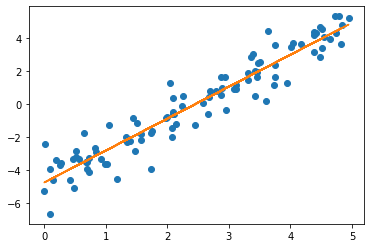

In [98]:
# 创建一个函数来做最小二乘

#可以设置fit_intercept = True， 后期可以写成一个函数
fit_intercept = True

# 取出X和Y的值，准备开始写回归公式
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

#如果fit_intercept = True的话，X前面需要加上一个1例
if fit_intercept:
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones, X))
    
# 转换成matrix， 注意Y的格式，是一列
X = np.mat(X)
Y = np.mat(Y).T

# 计算参数w
w = (X.T * X).I * X.T * Y

# 预测这个数据
Y_pred = X * w

# 预测数据并且画出最后的结果
plt.plot(X[:, 1], Y, 'o')
plt.plot(X[:, 1], Y_pred)

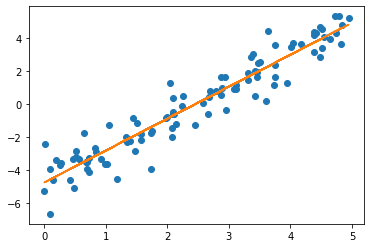

In [139]:
#把上面的步骤写成函数
def LR_frank(X, Y, fit_intercept = True):
    if fit_intercept:
        ones = np.ones((X.shape[0],1))
        X = np.hstack((ones, X))
    X = np.mat(X)
    Y = np.mat(Y).T

    w = (X.T * X).I * X.T * Y
    Y_pred = X * w
    return X, Y, w, Y_pred
    
#测试函数是否可以运行
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]
X, Y, w, Y_pred = LR_frank(X, Y)

plt.plot(X[:, -1], Y, 'o')
plt.plot(X[:, -1], Y_pred)

In [100]:
# 尝试使用SSE评价指标
# 矩阵的形式计算SSE
# np.array((Y - Y_pred).T * (Y - Y_pred))[0][0]

# 简单的形式计算SSE
SSE = np.power(Y - Y_pred, 2).sum()
SSE

#算出MSE
MSE = SSE / X.shape[0]

#算出SST
SST = Y.var() * X.shape[0]

#算出R^2
1 - SSE/SST

0.9104352692515009

In [14]:
#手写一个类似sklearn的回归
class linear_reg:
    def __init__(self,
                 fit_intercept = True
                ):
        self.fit_intercept = fit_intercept
    
    def fit(self, X, Y,):
        if self.fit_intercept:
            ones = np.ones((X.shape[0],1))
            X = np.hstack((ones,X))
        self.X = np.mat(X)
        self.Y = np.mat(Y).T
        
        theta = (self.X.T * self.X).I * self.X.T * self.Y
        self.coef_ = np.ravel(theta)[1:]
        self.intercept_ = np.ravel(theta)[0]
        self.theta = theta
    
    def predict(self, X):
        if self.fit_intercept:
            ones = np.ones((X.shape[0],1))
            X = np.hstack((ones,X))
        return np.mat(X) * self.theta
    
    def score(self, Xtest, Ytest):
        Y_pred = self.predict(Xtest)
        Ytest = np.mat(Ytest).T
        SSE = (Ytest - Y_pred).T * (Ytest - Y_pred)
        SSE = np.array(SSE).ravel()[0] / X.shape[0]
        SST = np.var(Ytest)
        R_square = 1 - SSE/SST
        return R_square

model_frank = linear_reg()
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]
model_frank.fit(X, Y)
model_frank.score(X, Y), model_frank.intercept_, model_frank.coef_

(0.9104352692515009, -4.763042745851086, array([1.93698502]))

In [122]:
# sklearn实现
from sklearn.linear_model import LinearRegression
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

reg = LinearRegression()
reg.fit(X, Y)

# 查看一些重要的接口以及其指标
reg.coef_, reg.intercept_


(array([1.93698502]), -4.763042745851092)

In [123]:
# 预测以及评估指标,.score给出的是R平方的结果
reg.score(X, Y)

0.910435269251501

In [124]:
# 使用sklearn里面的包来做相应的回归类算法的评估
from sklearn.metrics import mean_squared_error, r2_score

# 首先要预测出标签
Y_pred = reg.predict(X)

# 将预测标签和真实标签一同放入包内

mean_squared_error(Y, Y_pred), r2_score(Y, Y_pred)

(0.799761865601158, 0.910435269251501)

In [130]:
lam = 0.3
np.mat(lam * np.eye(10))

matrix([[0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3]])

In [176]:
# Ridge回归

#把上面LR函数的步骤写成函数
#把上面的步骤写成函数
def Ridge_LR_frank(X, Y, alpha = 0.1, 
             fit_intercept = True):
    if fit_intercept:
        ones = np.ones((X.shape[0],1))
        X = np.hstack((ones, X))
    X = np.mat(X)
    Y = np.mat(Y).T

    lam_eye = np.mat(alpha * np.eye(X.shape[1]))
    w = (X.T * X + lam_eye).I * X.T * Y
    Y_pred = X * w
    return X, Y, w, Y_pred
    
#测试函数是否可以运行
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]
X, Y, w, Y_pred = Ridge_LR_frank(X, Y)

#plt.plot(X[:, -1], Y, 'o')
#plt.plot(X[:, -1], Y_pred)


#测试函数是否可以运行


In [186]:
# 读取abalone.csv数据来尝试
data = pd.read_csv('abalone.txt',header=None,sep='\t')
data.columns=['性别','长度','直径','高度','整体重量','肉重量','内脏重量','壳重','年龄']   # 补充
data.head()

X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

# 使用原始的
X1, Y1, w, Y_pred = LR_frank(X, Y)

# 使用手写Ridge的
X2, Y2, w_ridge, Y_pred_ridge = Ridge_LR_frank(X, Y, alpha = 0.2)

# 使用sklearnRidge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.2)
ridge.fit(X, Y)

Ridge(alpha=0.2)

In [187]:
# 原始的线性模型
np.array(w).ravel()
r2_score(Y_pred, Y), mean_squared_error(Y_pred, Y)

(0.10566931101737853, 4.906524345190111)

In [196]:
# 自己写的Ridge
print(np.around(np.array(w_ridge).ravel(), 2))
r2_score(Y_pred_ridge, Y),mean_squared_error(Y_pred_ridge, Y)

[  3.     0.06  -0.02  11.45  11.06   8.72 -19.71  -8.9    9.19]


(0.09119274470725691, 4.908888764868644)

In [193]:
# sklearn Ridge
print(ridge.coef_)
print(ridge.intercept_)
Y_sk_pred = ridge.predict(X)
r2_score(Y_sk_pred, Y),mean_squared_error(Y_sk_pred, Y)

[  0.06156109  -0.03945719  11.44686599  11.05067799   8.72212668
 -19.70755072  -8.8949646    9.19236679]
3.005201531224067


(0.09085790602512467, 4.9089008736893565)

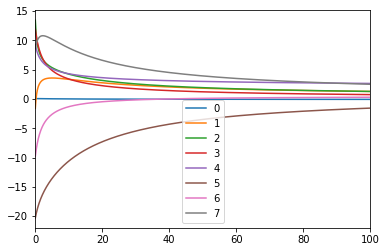

In [203]:
# 尝试看一下不断增大lam的值，观察theta的表现
from sklearn.model_selection import cross_val_score

l_alpha = np.linspace(0, 100, 1000)
#记录每一个lam所对应的各个theta的值
l_theta = []

for i in l_alpha:
    ridge = Ridge(alpha = i)
    ridge.fit(X, Y)
    l_theta.append(ridge.coef_)

pd.DataFrame(l_theta, index = l_alpha).plot()

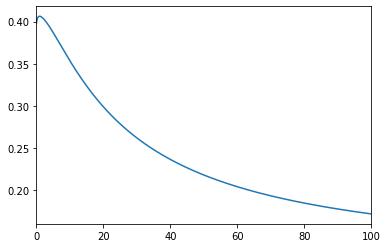

In [210]:
from sklearn.model_selection import cross_val_score

l_alpha = np.linspace(0, 100, 1000)
#记录每一个lam所对应的各个theta的值
l_r2 = []

for i in l_alpha:
    ridge = Ridge(alpha = i)
    s = cross_val_score(ridge, X, Y, cv = 5).mean()
    l_r2.append(s)

pd.Series(l_r2, index = l_alpha).plot()

In [215]:
ridge = Ridge(alpha = 0)
cross_val_score(ridge, X, Y, cv = 5).mean()

0.3980361557787388

In [213]:
pd.Series(l_r2, index = l_alpha).idxmax()

0.9009009009009009

In [11]:
# 尝试使用sklearn的Lasso

# 还是使用alpha = 0.2

#查看参数


In [12]:
alpha_list = np.linspace(0,0.05,100)
l_theta = []

In [36]:
# 房屋数据集

import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

housevalue = fch()

X = pd.DataFrame(housevalue.data)
y = housevalue.target
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
            ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]

In [ ]:
# 切分数据集
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)